<a href="https://colab.research.google.com/github/gadilshina-ve/BDP_MGPU/blob/main/Lab_work_4/rezult_1_David_Weber__The_Shadow_of_Saganami/Gadilshina_1_DB_MapReduce_3%3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа с данными студента**

In [1]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# проверка каталога
!ls sample_data

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [3]:
#удаление дубликатов
!rm 90.txt

rm: cannot remove '90.txt': No such file or directory


In [4]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 90.txt to 90.txt


In [ ]:
#объединение  текстов студента в один массив данных

first = True
with open('stud1.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(90, 91)]) #
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')

In [14]:
filename = 'stud1.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)

text_lower2=text_lower.split(' ')
text_lower2

['',
 'litru',
 'ru',
 '',
 'электронная',
 'библиотека',
 '',
 'название',
 'книги',
 'the',
 'shadow',
 'of',
 'saganami',
 'авторы',
 'weber',
 'david',
 '',
 '',
 'жанр',
 'космическая',
 'фантастика',
 'боевая',
 'фантастика',
 'адрес',
 'книги',
 '',
 '',
 'аннотация',
 'tradition',
 'lives',
 'and',
 'so',
 'lives',
 'the',
 'honor',
 'of',
 'rmn',
 '',
 'small',
 'squadron',
 'in',
 'new',
 'quadrant',
 'known',
 'as',
 'talbott',
 'cluster',
 'which',
 'voted',
 'to',
 'be',
 'a',
 'part',
 'of',
 'star',
 'kingdom',
 '',
 'faces',
 'separatist',
 'terrorists',
 'havenite',
 'military',
 'criminals',
 'and',
 'slavetraders',
 'in',
 'best',
 'traditions',
 'of',
 'rmn',
 '',
 'but',
 'what',
 'manty',
 'doesnt',
 'know',
 'is',
 'that',
 'behind',
 'their',
 'enemies',
 'stays',
 'other',
 'power',
 'power',
 'which',
 'already',
 'prepares',
 'large',
 'fleet',
 'of',
 'exsol',
 'league',
 'battleships',
 'to',
 'take',
 'over',
 'new',
 'terminus',
 'of',
 'manticoran',
 'wo

In [15]:
len(text_lower2)

307979

In [17]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]

dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['litru',
 'ru',
 'электронная',
 'библиотека',
 'название',
 'книги',
 'the',
 'shadow',
 'of',
 'saganami',
 'авторы',
 'weber',
 'david',
 'жанр',
 'космическая',
 'фантастика',
 'боевая',
 'фантастика',
 'адрес',
 'книги',
 'аннотация',
 'tradition',
 'lives',
 'and',
 'so',
 'lives',
 'the',
 'honor',
 'of',
 'rmn',
 'small',
 'squadron',
 'in',
 'new',
 'quadrant',
 'known',
 'as',
 'talbott',
 'cluster',
 'which',
 'voted',
 'to',
 'be',
 'a',
 'part',
 'of',
 'star',
 'kingdom',
 'faces',
 'separatist',
 'terrorists',
 'havenite',
 'military',
 'criminals',
 'and',
 'slavetraders',
 'in',
 'best',
 'traditions',
 'of',
 'rmn',
 'but',
 'what',
 'manty',
 'doesnt',
 'know',
 'is',
 'that',
 'behind',
 'their',
 'enemies',
 'stays',
 'other',
 'power',
 'power',
 'which',
 'already',
 'prepares',
 'large',
 'fleet',
 'of',
 'exsol',
 'league',
 'battleships',
 'to',
 'take',
 'over',
 'new',
 'terminus',
 'of',
 'manticoran',
 'wormhole',
 'junction',
 'new',
 'spinoff',
 'book',

In [19]:
from google.colab import files
with pd.ExcelWriter('allstudentWords_1.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud1')
files.download('allstudentWords_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [21]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d63385d8ddc2be3a6f7775cb36db68c3d3eb30a742e03622f0044aca88c4ba6c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [22]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['litru',
 'ru',
 'электронный',
 'библиотека',
 'название',
 'книга',
 'the',
 'shadow',
 'of',
 'saganami',
 'автор',
 'weber',
 'david',
 'жанр',
 'космический',
 'фантастика',
 'боевой',
 'фантастика',
 'адрес',
 'книга',
 'аннотация',
 'tradition',
 'lives',
 'and',
 'so',
 'lives',
 'the',
 'honor',
 'of',
 'rmn',
 'small',
 'squadron',
 'in',
 'new',
 'quadrant',
 'known',
 'as',
 'talbott',
 'cluster',
 'which',
 'voted',
 'to',
 'be',
 'a',
 'part',
 'of',
 'star',
 'kingdom',
 'faces',
 'separatist',
 'terrorists',
 'havenite',
 'military',
 'criminals',
 'and',
 'slavetraders',
 'in',
 'best',
 'traditions',
 'of',
 'rmn',
 'but',
 'what',
 'manty',
 'doesnt',
 'know',
 'is',
 'that',
 'behind',
 'their',
 'enemies',
 'stays',
 'other',
 'power',
 'power',
 'which',
 'already',
 'prepares',
 'large',
 'fleet',
 'of',
 'exsol',
 'league',
 'battleships',
 'to',
 'take',
 'over',
 'new',
 'terminus',
 'of',
 'manticoran',
 'wormhole',
 'junction',
 'new',
 'spinoff',
 'book',


In [23]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [24]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [25]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [26]:
print(list1)

[('litru', 1), ('электронный', 1), ('библиотека', 1), ('название', 1), ('книга', 1), ('the', 1), ('shadow', 1), ('saganami', 1), ('автор', 1), ('weber', 1), ('david', 1), ('жанр', 1), ('космический', 1), ('фантастика', 1), ('боевой', 1), ('фантастика', 1), ('адрес', 1), ('книга', 1), ('аннотация', 1), ('tradition', 1), ('lives', 1), ('and', 1), ('lives', 1), ('the', 1), ('honor', 1), ('rmn', 1), ('small', 1), ('squadron', 1), ('new', 1), ('quadrant', 1), ('known', 1), ('talbott', 1), ('cluster', 1), ('which', 1), ('voted', 1), ('part', 1), ('star', 1), ('kingdom', 1), ('faces', 1), ('separatist', 1), ('terrorists', 1), ('havenite', 1), ('military', 1), ('criminals', 1), ('and', 1), ('slavetraders', 1), ('best', 1), ('traditions', 1), ('rmn', 1), ('but', 1), ('what', 1), ('manty', 1), ('doesnt', 1), ('know', 1), ('that', 1), ('behind', 1), ('their', 1), ('enemies', 1), ('stays', 1), ('other', 1), ('power', 1), ('power', 1), ('which', 1), ('already', 1), ('prepares', 1), ('large', 1), ('

In [27]:
print(list2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Merging the two lists

In [28]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [29]:
final_list.sort()

In [30]:
len(final_list)

226843

In [31]:
final_list[0]

('', 1)

In [32]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [33]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [34]:
len(map1)

226842

In [35]:
len(map2)

0

In [36]:
print(map1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
print(map2)

[]


# Reducer

Defining the reducer function

In [38]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [39]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [40]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [41]:
list3 = reduce1(map1)

Reducing the second n-z list

In [42]:
list4 = reduce2(map2)

Merging the two reduced lists

In [43]:
answer_list = list3 + list4
print(answer_list)

[('aback', 1), ('abandon', 10), ('abandoned', 17), ('abandoning', 3), ('abattoir', 4), ('abbreviated', 2), ('abdicate', 1), ('abduct', 1), ('abduction', 2), ('abercrombie', 1), ('abetting', 1), ('abhors', 1), ('abide', 2), ('abigail', 164), ('abigailhad', 1), ('abigaillieutenant', 1), ('abigails', 24), ('abigal', 1), ('abilities', 1), ('ability', 41), ('abject', 3), ('ablative', 1), ('able', 143), ('aboard', 150), ('abort', 1), ('about', 755), ('aboutfriends', 1), ('aboutonce', 1), ('abouttorch', 1), ('aboutyet', 1), ('above', 29), ('abrasively', 1), ('abrupt', 9), ('abruptly', 26), ('absence', 6), ('absent', 3), ('absentia', 1), ('absently', 2), ('absentminded', 1), ('absentmindedness', 1), ('absolute', 14), ('absolutely', 41), ('absolve', 3), ('absorb', 1), ('absorbed', 2), ('abstain', 1), ('abstract', 1), ('abstracted', 1), ('absurd', 3), ('absurdly', 2), ('abundanceone', 1), ('abundantly', 3), ('abuse', 1), ('abused', 2), ('abuses', 5), ('abusing', 1), ('abutts', 1), ('abyss', 1), 

# Final Dataframe

In [44]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

,Word,Frequency
0,aback,1
1,abandon,10
2,abandoned,17
3,abandoning,3
4,abattoir,4
...,...,...
16134,книга,2
16135,космический,1
16136,название,1
16137,фантастика,2


In [45]:
print(df.to_string())

                                      Word  Frequency
0                                    aback          1
1                                  abandon         10
2                                abandoned         17
3                               abandoning          3
4                                 abattoir          4
5                              abbreviated          2
6                                 abdicate          1
7                                   abduct          1
8                                abduction          2
9                              abercrombie          1
10                                abetting          1
11                                  abhors          1
12                                   abide          2
13                                 abigail        164
14                              abigailhad          1
15                       abigaillieutenant          1
16                                abigails         24
17                          

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16139 entries, 0 to 16138
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       16139 non-null  object
 1   Frequency  16139 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 252.3+ KB


In [47]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

,Word,Frequency
14248,the,13917
529,and,7247
14238,that,3253
15602,was,3031
6563,her,2424
...,...,...
7530,irritants,1
7535,isaac,1
7537,isand,1
7539,isidorprobably,1


# EN

In [48]:
!rm stop-words_en.xlsx

rm: cannot remove 'stop-words_en.xlsx': No such file or directory


In [49]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [50]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    179
0             179
dtype: int64


In [54]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
#убираем слова-стоп
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_91'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

Unnamed: 0    179
stop_en       179
dtype: int64
        WordStudent_91  Frequency
0                 said       1280
1                  one       1032
2                would        900
3                 even        739
4                could        663
...                ...        ...
16032          desired          1
16033  desirablelatest          1
16034        deserting          1
16035        desertdry          1
16036      электронный          1

[16037 rows x 2 columns]
WordStudent_91    16037
Frequency         16037
dtype: int64


# RU

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
df_stop= pd.read_excel("stop-words-ru+.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

In [ ]:
df_student=df_student_clear2
df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
#df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

# PLOT

<ipython-input-55-3afa0d9d68f3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_91'],rotation=75)


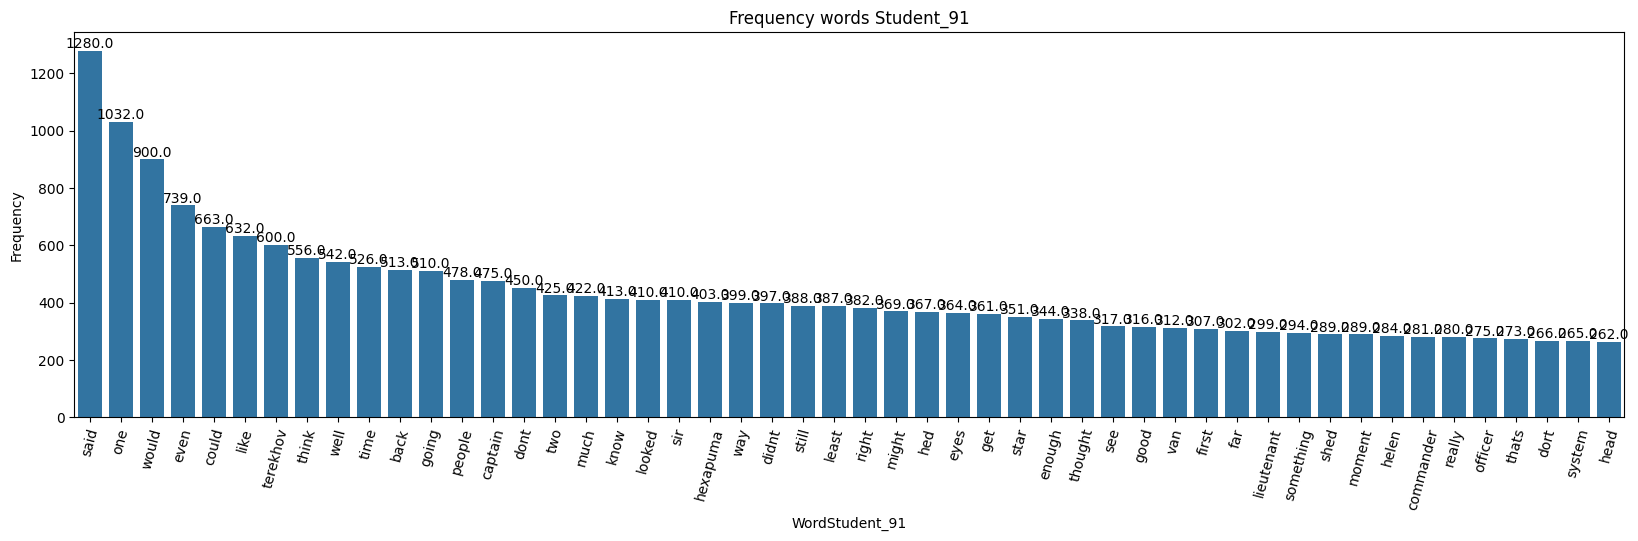

In [55]:
#Plotting the top 5 words by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_91',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_91'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_91")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [56]:
from google.colab import files
with pd.ExcelWriter('outputStudents_1.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_91')
files.download('outputStudents_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
!ls

90.txt			allstudentWords.xlsx   sample_data	   stud1.txt
allstudentWords_1.xlsx	outputStudents_1.xlsx  stop-words_en.xlsx  stud.txt


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [120]:
!rm Analise_Gadilshina_1.xlsx

rm: cannot remove 'Analise_Gadilshina_1.xlsx': No such file or directory


In [121]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce (1).xlsx


In [122]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
df_teach
print(df_teach.count())

Unnamed: 0      428
KorpusZakova    428
Frequency       428
dtype: int64


In [123]:
df_stud = pd.read_excel("outputStudents_1.xlsx", 'outputStudent_91')
#print(df_stud)
print(df_stud.count())

Unnamed: 0        16037
WordStudent_91    16037
Frequency         16037
dtype: int64


In [124]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_91.isin(df_teach.KorpusZakova)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_91':'WordSt_91Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_91'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_91Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

     Unnamed: 0  WordSt_91Tch  FrSt_91
0          3129          year        8
1          4366       written        5
2         13748         write        1
3           801        worked       36
4          1012         words       29
..          ...           ...      ...
321        2450      activity       10
322        3676    activities        6
323        3872  accomplished        6
324        9727      academic        1
325         147          able      143

[326 rows x 3 columns]
Unnamed: 0      326
WordSt_91Tch    326
FrSt_91         326
dtype: int64


In [125]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusZakova.isin(df_stud.WordStudent_91)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusZakova':'WordSt_91Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_91Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

     Unnamed: 0  WordSt_91Tch  FrTch
0           101          year      2
1           103       written      2
2             9         write      9
3           299        worked      1
4            22         words      5
..          ...           ...    ...
321          25      activity      4
322          59    activities      3
323         204  accomplished      1
324         179      academic      1
325          86          able      2

[326 rows x 3 columns]
Unnamed: 0      326
WordSt_91Tch    326
FrTch           326
dtype: int64


In [126]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

,WordSt_91Tch,FrTch
0,topic,18
1,students,17
2,lesson,16
3,plan,13
4,main,13
...,...,...
321,reality,1
322,references,1
323,talent,1
324,reflect,1


In [127]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

,WordSt_91Tch,FrSt_91
0,one,1032
1,even,739
2,could,663
3,like,632
4,think,556
...,...,...
321,segment,1
322,teaching,1
323,documentary,1
324,creature,1


In [128]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res.head

<bound method NDFrame.head of     WordSt_91Tch  FrTch  FrSt_91
0          topic     18        1
1       students     17        3
2         lesson     16        2
3           plan     13       46
4           main     13       43
..           ...    ...      ...
321      reality      1        7
322   references      1        1
323       talent      1        3
324      reflect      1        5
325      highest      1       12

[326 rows x 3 columns]>

In [129]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

,WordSt_91Tch,FrSt_91,FrTch
0,one,1032,4
1,even,739,2
2,could,663,3
3,like,632,5
4,think,556,2
...,...,...,...
321,segment,1,1
322,teaching,1,1
323,documentary,1,1
324,creature,1,1


In [130]:
from google.colab import files
with pd.ExcelWriter('rezult_1.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
x=res['WordSt_91Tch'].values.tolist()

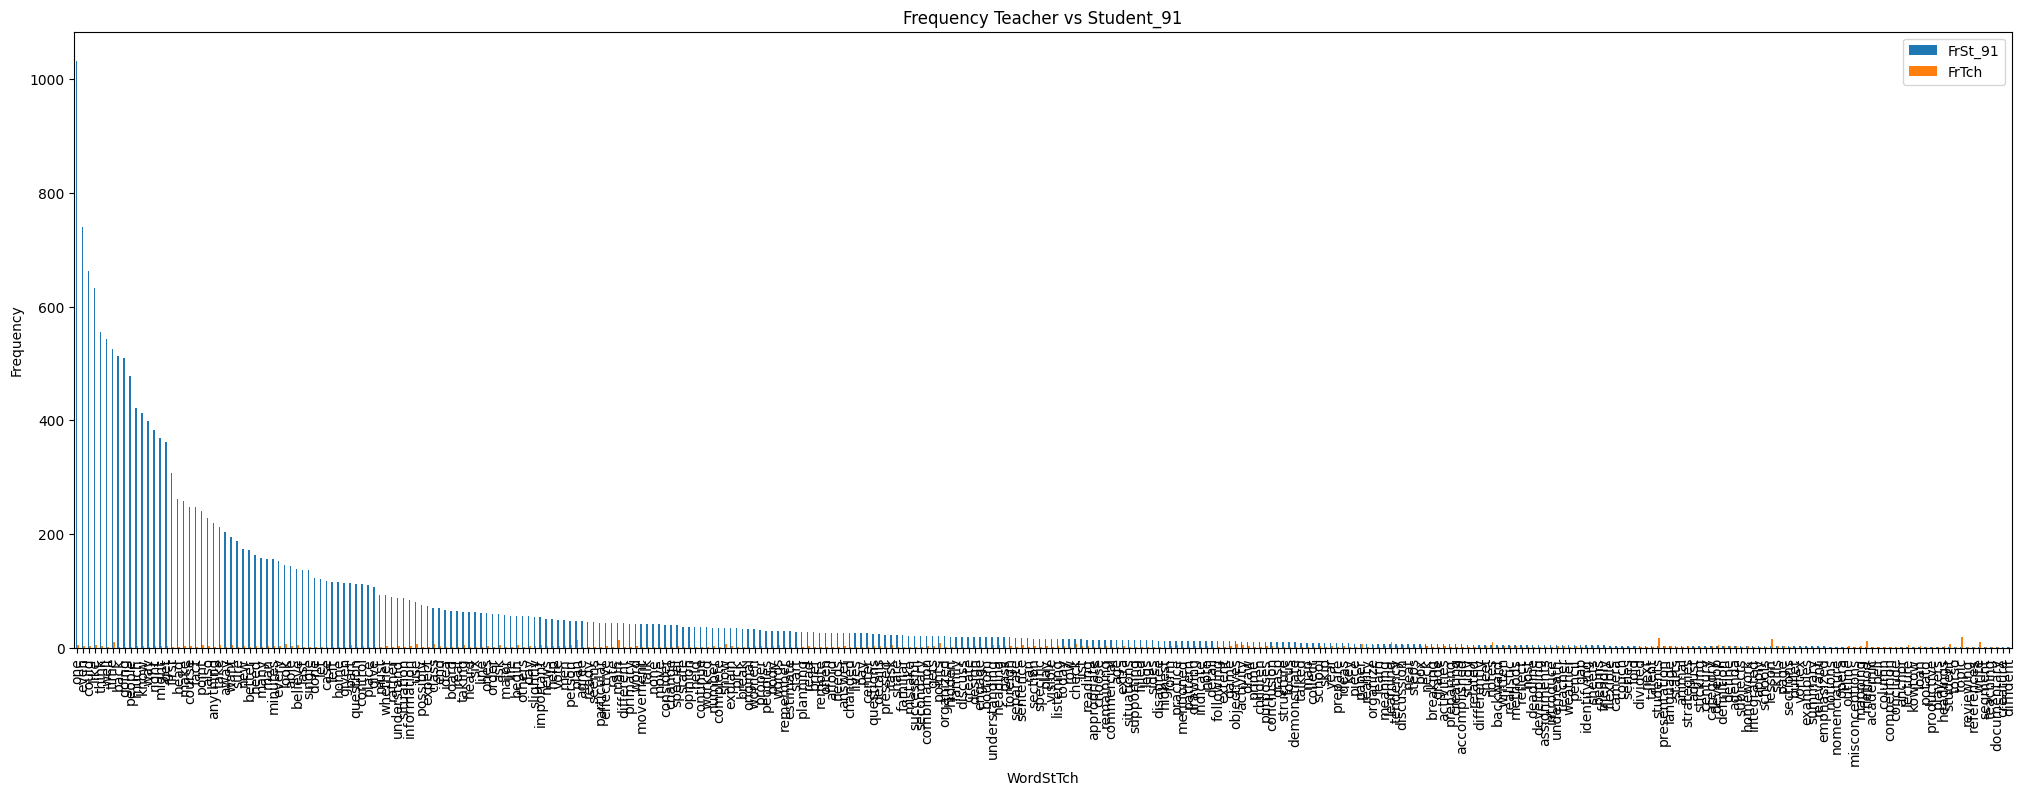

In [132]:
res.plot(kind='bar', figsize=(25,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_91")
plt.xticks(x_pos, x)
plt.show()

In [137]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

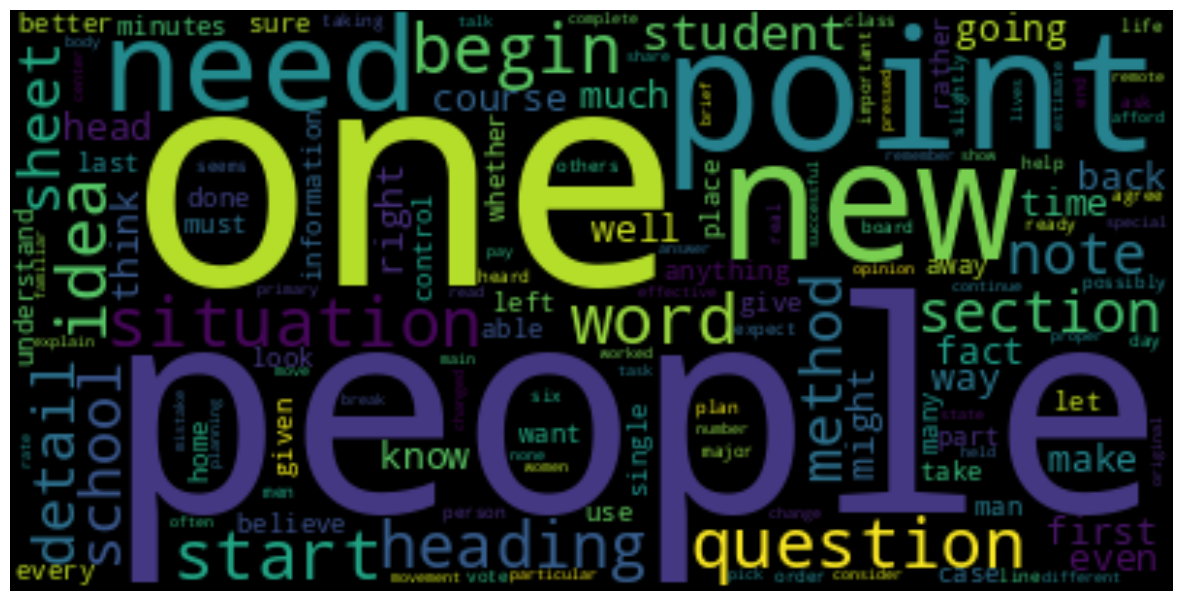

In [138]:
viz=res['WordSt_91Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")